In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("muted") # "deep", "muted", "colorblind"

plt.rcParams.update({
    "text.usetex": False,
    "font.size": 10,
    "axes.labelsize": 10,
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8,
    "axes.xmargin": 0.075,
    "axes.ymargin": 0.15,
    "figure.figsize": [3.5, 2.5],
    "savefig.dpi": 300,
    # "savefig.bbox": "tight",
})

def simple_annotate(ax, text, x, y): # ax 객체를 명시적으로 받도록 수정
    ax.annotate(
        text, 
        xy=(x, y), 
        xytext=(0, 6),
        textcoords='offset points', 
        ha='center', 
        fontsize=6
    )

/home/aikusrv02/anaconda3/lib/python3.12/site-packages/pandas/core/computation/expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.7' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
/home/aikusrv02/anaconda3/lib/python3.12/site-packages/pandas/core/arrays/masked.py:56: UserWarning: Pandas requires version '1.4.2' or newer of 'bottleneck' (version '1.3.7' currently installed).
  from pandas.core import (


Saved plot to /home/aikusrv02/_PROJECTS/wonjunoh/assignment1-basics-solution/results/lr_sweep.png


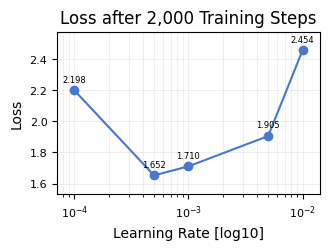

In [20]:
sweep_res = json.load(open(os.path.join(os.getcwd(), "sweep_lr_results.json"), "r"))
df = pd.DataFrame(sweep_res)

fig, ax = plt.subplots()
# plt.subplots_adjust(left=0.18, right=0.92, top=0.88, bottom=0.18)
plt.subplots_adjust(left=0.2, right=0.95, top=0.85, bottom=0.2)

ax.set_title('Loss after 2,000 Training Steps')
ax.set_xlabel('Learning Rate [log10]')
ax.set_xscale('log')
ax.set_ylabel('Loss')
ax.set_yscale('linear')
ax.grid(True, which="both", ls="-", alpha=0.2)

ax.plot(df['learning_rate'], df['final_loss'], marker='o')

for i, (lr, loss) in enumerate(zip(df['learning_rate'], df['final_loss'])):
    simple_annotate(ax,f'{loss:.3f}', lr, loss)

# 4. 저장 시 주의사항
fpath = os.path.join(os.getcwd(), "lr_sweep.png")

# bbox_inches='tight'를 절대 사용하지 마세요. 
# 사용하면 박스 크기가 텍스트 길이에 맞춰 다시 재계산되어 변하게 됩니다.
plt.savefig(fpath) 
print(f"Saved plot to {fpath}")

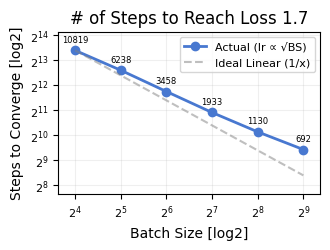

Saved plot to /home/aikusrv02/_PROJECTS/wonjunoh/assignment1-basics-solution/results/batch_sweep.png


In [19]:
sweep_res = json.load(open(os.path.join(os.getcwd(), "sweep_batch_results.json"), "r"))
df = pd.DataFrame(sweep_res)

first_bs = df['batch_size'].iloc[0]
first_iter = df['total_iters'].iloc[0]
ideal_iters = [first_iter * (first_bs / b) for b in df['batch_size']]

fig, ax = plt.subplots()
# plt.subplots_adjust(left=0.18, right=0.92, top=0.88, bottom=0.18)
plt.subplots_adjust(left=0.2, right=0.95, top=0.85, bottom=0.2)

ax.set_title('# of Steps to Reach Loss 1.7')

ax.set_xlabel('Batch Size [log2]')
ax.set_xscale('log', base=2)

ax.set_ylabel('Steps to Converge [log2]')
ax.set_yscale('log', base=2)

ax.grid(True, which="both", ls="-", alpha=0.2)

ax.plot(df['batch_size'], df['total_iters'], marker='o', linestyle='-', linewidth=2, label='Actual (lr ∝ √BS)')
ax.plot(df['batch_size'], ideal_iters, color='gray', linestyle='--', alpha=0.5, label='Ideal Linear (1/x)')

ax.legend(frameon=True)

for i, (bs, iters) in enumerate(zip(df['batch_size'], df['total_iters'])):
    simple_annotate(ax, f'{iters:.0f}', bs, iters)

fpath = os.path.join(os.getcwd(), "batch_sweep.png")
plt.savefig(fpath)
plt.show()

print(f"Saved plot to {fpath}")

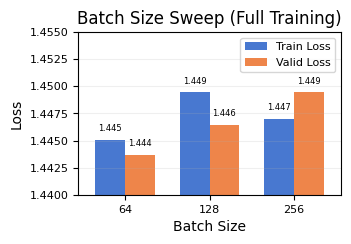

Saved plot to /home/aikusrv02/_PROJECTS/wonjunoh/assignment1-basics-solution/results/train_result.png


In [18]:
train_res = json.load(open(os.path.join(os.getcwd(), "train.json"), "r"))
valid_res = json.load(open(os.path.join(os.getcwd(), "valid.json"), "r"))

train_df = pd.DataFrame(train_res)
valid_df = pd.DataFrame(valid_res)
train_df = train_df.rename(columns={'final_loss': 'train_loss'})
merged_df = pd.merge(train_df, valid_df, left_on='run_name', right_on='run_name')


fig, ax = plt.subplots()
plt.subplots_adjust(left=0.2, right=0.95, top=0.85, bottom=0.2)
# plt.subplots_adjust(left=0.25, right=0.9, top=0.8, bottom=0.2)

x = np.arange(len(merged_df['run_name']))
width = 0.35

bars1 = ax.bar(x - width/2, merged_df['train_loss'], width, label='Train Loss')
bars2 = ax.bar(x + width/2, merged_df['valid_loss'], width, label='Valid Loss')

ax.set_title('Batch Size Sweep (Full Training)')
ax.set_xlabel('Batch Size')
ax.set_xticks(x)
ax.set_xticklabels(merged_df['batch_size'])

ax.set_ylabel('Loss')
ax.set_ylim(1.44, 1.455)

ax.grid(True, which="both", ls="-", alpha=0.2, axis='y')
ax.legend(frameon=True, loc='upper right')

for bar in bars1:
    height = bar.get_height()
    simple_annotate(ax, f'{height:.3f}', bar.get_x() + bar.get_width() / 2, height)

for bar in bars2:
    height = bar.get_height()
    simple_annotate(ax, f'{height:.3f}', bar.get_x() + bar.get_width() / 2, height)

fpath = os.path.join(os.getcwd(), "train_result.png")
plt.savefig(fpath)
plt.show()

print(f"Saved plot to {fpath}")